# Challenge 3

### The question
For challenge 3 we are tasked to compare machine learning algorithms and see which ever one is best. Within this notebook we are going to be trying out; SVM, MLP, Random Forest and Ensembly Learning. We will comparing the accuracy and seeing which algorithm is the best for this dataset.

### Optimizing the algorithms
The assignment is to test and find the best options for the algorithm. We are going to do this by running the test data multiple times with different options. These will all print out their accuracy and will be put in multiple graphs.
### Personal goals
#### Moduality
This has also been applied in challenge 1, I want to make all my methods as modular as possible. This means having my own methods have plenty of parameters to edit the SKLearn methods.
#### Documentation
I want to document everything as well as I possibly can. Making comments on code lines and having markdown sections to explain my reasoning behind the code as well as I can. This will be the biggest challenge for me.

# Table of Content
### [Dataset](#dataset)
### [Analythics:](#analythics)
- ##### [Boxplots](#boxplots) 
- ##### [Scatterplots](#scatterplots)
- ##### [kbest](#kbest)
- ##### [Conclusion](#dataset_conclusion)

### [Prepairing the Data](#prep_data)

### [Machine Learning:](#machine_learning)
- ##### [Accuracy tests](#ml_accuracy)
- ##### [Adding the classifiers](#ml_add_clf)
    - [SVM](#ml_svm)
    - [Decision Tree Classifier](#ml_dtc)
    - [MLP Nueral network](#ml_mlp)
- ##### [Testing the Classifier list](#ml_test_clf)
- ##### [Comparing the methods](#ml_comp_clf)

### [Testing with Iris dataset](#test_iris)
### [Testing with the Voice dataset](#test_voice)

### [Conclusion](#conclusion)
- ##### [Answering the question](#conclusion_question)
- ##### [Personal goals](#conclusion_personal)
- ##### [What did I learn](#conclusion_learn)

# The dataset <a class="anchor" id="dataset"></a>
The dataset I picked for this assignment was Gender Recognition by Voice. After searching for a usable dataset this one peaked my interest and was good to work with. I found this dataset on Kaggle and [***this is the link to the dataset***](https://www.kaggle.com/primaryobjects/voicegender).
The domain of this dataset is ***DOMAIN*** because...


### Description
Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz
### Columns
**sd:** standard deviation of frequency

**median:** median frequency (in kHz)

**Q25:** first quantile (in kHz)

**Q75:** third quantile (in kHz)

**IQR:** interquantile range (in kHz)

**skew:** skewness (see note in specprop description)

**kurt:** kurtosis (see note in specprop description)

**sp.ent:** spectral entropy

**sfm:** spectral flatness

**mode:** mode frequency

**centroid:** frequency centroid (see specprop)

**meanfun:** average of fundamental frequency measured across acoustic signal

**minfun:** minimum fundamental frequency measured across acoustic signal

**maxfun:** maximum fundamental frequency measured across acoustic signal

**meandom:** average of dominant frequency measured across acoustic signal

**mindom:** minimum of dominant frequency measured across acoustic signal

**maxdom:** maximum of dominant frequency measured across acoustic signal

**dfrange:** range of dominant frequency measured across acoustic signal

**modindx:** modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental
frequencies divided by the frequency range

**label:** male or female
### Label and goal
The label is stored in the *label* column and is saved as a string so will be need to remapped to a simple number. Our goal is to indentify what gender someone is by the properties of their voice.

# Prepairing the notebook <a class="anchor" id="#notebookprep"></a>
To start off this notebook we are going to be making methods. We make these to prepare for a dataset which might change. As this is the first dataset I need to pick myself, it might be a unusable dataset with features that are not good enough to use in this context. With the methods made I can simply change out the dataset and everything should still work.

Since Katherine and I also did this for challenge 1 to be able to swap out the Iris and Whine set easily, I will be getting my code from the challenge 1. This will be noted in the documentation but will still be explained.
### Importing libraries
We will be using a lot of libraries within this notebook and I will document these all in this code section. There should be no import throughout the notebook itself.

In [56]:
#Core libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
#Further imports
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn import metrics
#Versionprinting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
print('NumPy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Scikit-learn version:', sk.__version__)
print('Matplotlib version:', matplotlib.__version__)
#Inline version
%matplotlib inline

NumPy version: 1.12.1
Pandas version: 0.20.1
Scikit-learn version: 0.18.1
Matplotlib version: 2.0.2


### Getting the dataset
I currently have the dataset downloaded to my computer since kaggle doesn't support direct downloads. I will include the file in the zip and this can also be found in my GitHub.

In [2]:
df_voice = pd.read_csv("voice.csv")
df_voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


From this info we can see that this DataFrame is already clean, the features are numbers and non-null. We only need to convert the label into a number. We can do this by calling the `map()` function on the dataframe and save the data in a new column.

In [12]:
df_voice['gender'] = df_voice['label'].map({'male': 0, 'female': 1})
print(df_voice[["gender", "label"]].head(5))
print(df_voice[["gender", "label"]].tail(5))

   gender label
0       0  male
1       0  male
2       0  male
3       0  male
4       0  male
      gender   label
3163       1  female
3164       1  female
3165       1  female
3166       1  female
3167       1  female


# Analysis<a class="anchor" id="analythics"></a>
### Boxplots<a class="anchor" id="boxplots"></a>
To analyze our features we want to look at the features and see how they compare. What features are good to use and where do we see the least amount of overlap. To make this easier on ourselves, we are going to write an automated method to do this work. We can just make a list of features and run these through the method and out come all the boxplots.

In [4]:
def boxPlots(df, features, label):
    if(len(features)>4):
        for i in range(int(len(features)/4)):
            try:
                df.boxplot(column=features[4*i:4*(i+1)], by=label, figsize=(15,8), layout=(1,4))
            except:
                remaining = (i*4+1) - len(features)
                for r in range(remaining):
                    print(i*4+1+r)
                    len(features)
                    df.boxplot(column=features[i*4+1+r], by=label, figsize=(15,8), layout=(1,4))
    else:
        df.boxplot(column=features, by=label, figsize=(15,8), layout=(1,4))
#         maximums = []
#         for i in range(len(features)):
#             maximums.append(max(df[features[i]]))
#         for i in range(int(len(features)/4)+1):
#             seperate=False
#             seperateindex = 0
#             beginindex = 4*i
#             endindex= 4*(i+1)
#             equalizer = 5
#             plotted = features[beginindex:endindex]
#             try:
#                 for q in range(4):
#                     if(int(maximums[beginindex+q]/maximums[beginindex]) > equalizer) or (int(maximums[beginindex+q]/maximums[beginindex+1]) > equalizer) or(int(maximums[beginindex+q]/maximums[beginindex+2]) > equalizer) or (int(maximums[beginindex+q]/maximums[beginindex+3]) > equalizer):
#                         seperate = True
#                         seperateindex = q
#             except:
#                 seperate = True 
#             if(seperate == False):
#                 df.boxplot(column=plotted, by=label, figsize=(15,8), layout=(1,4))
#             else:
#                 rest = plotted[beginindex:seperateindex] + plotted[seperateindex+1:endindex]
#                 print("Index: " + str(seperateindex))
#                 print(len(plotted[beginindex:seperateindex]))
#                 print(len(plotted[seperateindex+1:endindex]))
#                 print(len(rest))
#                 df.boxplot(column=plotted[seperateindex], by=label, figsize=(15,8), layout=(1,4))
#                 df.boxplot(column=rest, by=label, figsize=(15,8), layout=(1,4))

## Explaination
### Defining the method
To start off, we give the method the name `boxPlots` it is descriptive enough for me and easy to type.
#### The parameters
    - df:       The dataframe used to visualize the features
    - features: A Tuple of the features wanting to be analysed
    - label:    The string of which column is the label
```py
def boxPlots(df, features, label):
```
### Checking the amount of features present
If we have more than 4 features we want to split them up in to multiple sets of 4. This is why we do an initial check to see if we have more than 4 features.
```py
if(len(features)>4):
```
### Printing the boxplots by 4
If there are more features than 4 we want to split these into groups of 4 and print them seperately.
First, we make a loop by deviding the amount of features by 4 and adding 1. The `int()` method **ALWAYS** rounds downwards and this is not good for us as the last features will be cut off. This is the reason we add 1.
Second, we want to try plotting all 4 figures at once, if this fails it is most likely an index out of range exception. To make sure all boxplots get plotted we calculate the remaining boxplots that need to be made and then draw them out one by one.
```py
for i in range(int(len(features)/4)):
    try:
        df.boxplot(column=features[4*i:4*(i+1)], by=label, figsize=(15,8), layout=(1,4))
    except:
        remaining = (i*4+1) - len(features)
        for r in range(remaining):
            print(i*4+1+r)
            len(features)
            df.boxplot(column=features[i*4+1+r], by=label, figsize=(15,8), layout=(1,4))
```

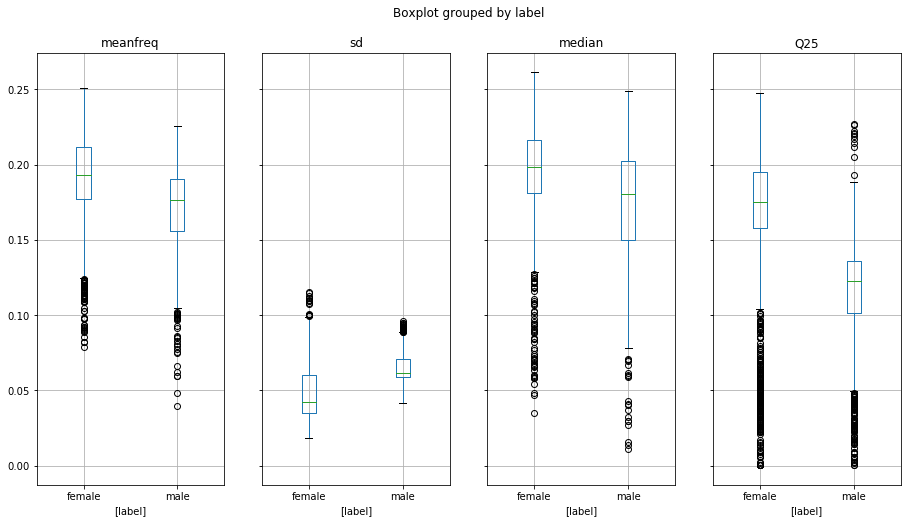

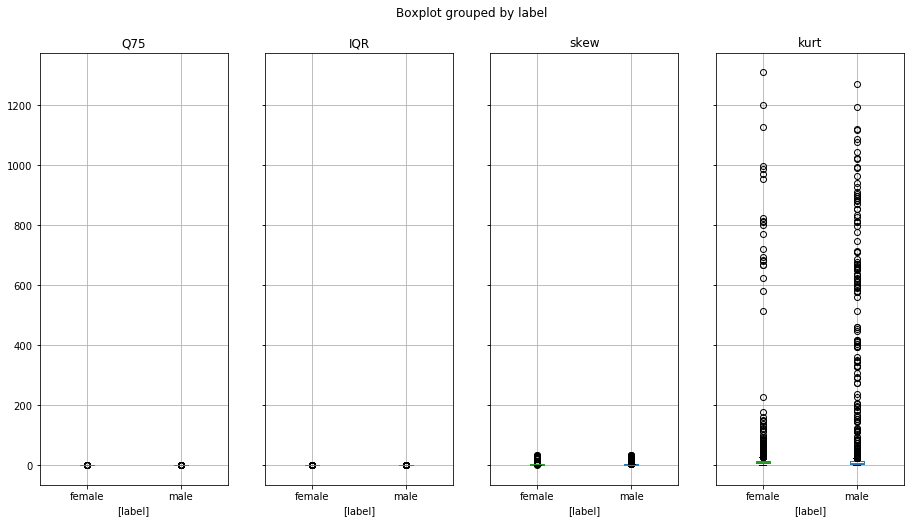

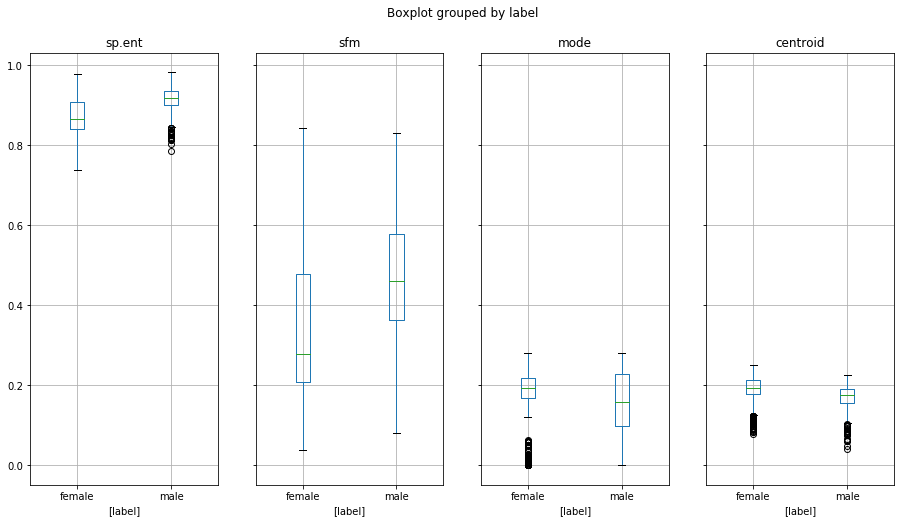

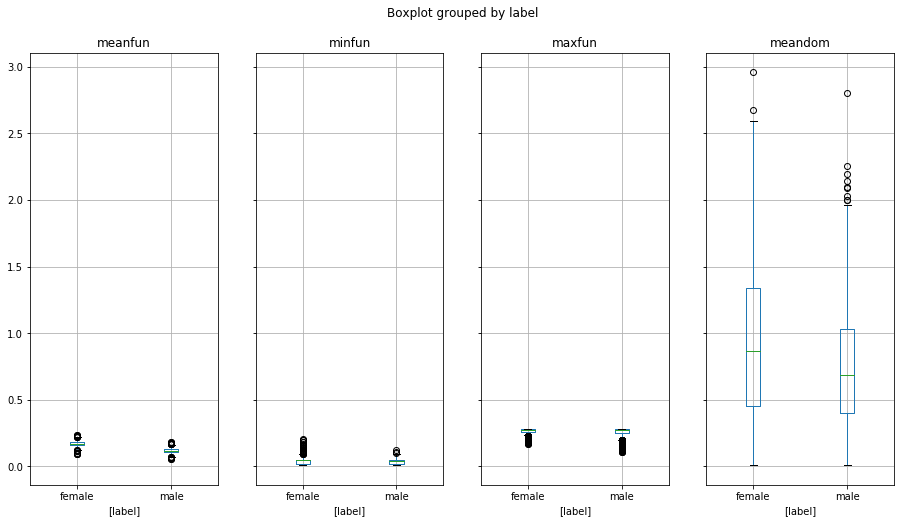

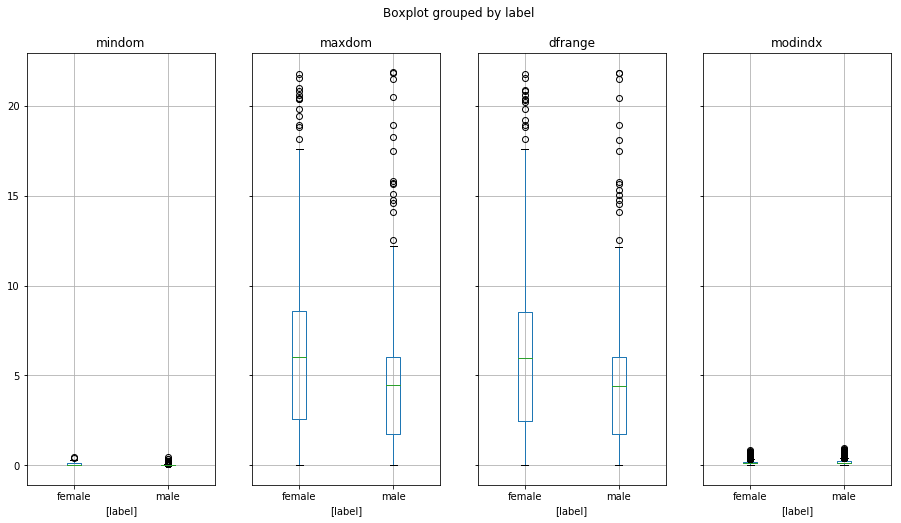

In [5]:
boxPlots(df_voice, list(df_voice)[:21], ["label"])

### Scatterplots <a class="anchor" id="scatterplots"></a>
We can also use scatter plots to see how the features are seperated from each other. This is a very clear and visual representation of these points. Again we would like to automate things to make it easy to work with our dataset and swap features if needed.

In [6]:
def scatterplots(features, y, colors, labelnames, splitsize, random):    
    for value in features:
        names = list(value)
        value = StandardScaler().fit(value).transform(value)
        X_train, X_test, y_train, y_test = train_test_split(value,y,test_size=splitsize, random_state=random)
        for i in range(len(colors)):
            x1s = X_train[:, 0][y_train.as_matrix() == i]
            x2s = X_train[:, 1][y_train.as_matrix() == i]
            plt.scatter(x1s, x2s, c=colors[i])

        plt.legend(labelnames)
        plt.xlabel("Normalized " + names[0])
        plt.ylabel("Normalized " + names[1]);
        plt.show()

## Explaning the code
### Defining the method
To start off we want to make a method that we can pipe all the features we want to test through.
```py
def scatterplots(features, y, colors, labelnames, splitsize, random)
```
#### Parameters
    - features:   A list of the names of the features wanting to be used
    - y:          The column to be used as the label
    - colors:     The colors wanting to be used in the plot
    - labelnames: The names of the labels
    - splitsize:  Train-Test split size
    - random:     Train-Test random seed
### Prepairing for the graph
We save the names of the columns to later add them to the graph.
```py
names = list(value)
```
### Normalizing the data
We normalize the data to make it easier to work with. It takes less computing power to predict for and it is easier to work with in graphs. SKLearn prefers normalized data so we will do this as well. We made this into a powerful oneliner:
```py
value = StandardScaler().fit(value).transform(value)
```
### Splitting test and train data
To start off training the algorithm, we need to first split the data into train and test data. This is so we don't test our model on the same data that we have trained it with. SKLearn has a method for this we can get by importing the library.
```py
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(value,y,test_size=splitsize, random_state=random)
```
### Setting up the axis
To start off, we create a loop that will go through every color and there for also every label. We want to calculate the value on the X axis and the Y axis. We do this by looking at the normalized values we got before into X_train. X_train currently only holds 2 features. This means we can set the X as the first feature and the Y as the second one.

Resulting in the following lines:
```py
for i in range(len(colors)):
    x1s = X_train[:, 0][y_train.as_matrix() == i]
    x2s = X_train[:, 1][y_train.as_matrix() == i]
```
Lastly we want to make the plot work. We are going to use the `scatter()` function from matplotlib to display our graph. This needs X and Y points which we have just created. Optionally we can also use the `c` parameter to give a color.
```py
plt.scatter(x1s, x2s, c=colors[i])
```
This gets added to the loop so we add it to our existing plot. Only after `plt.show()` has been called does the plot get finalized. Before we do that we would want to do some visual changed to make it easier to read. First we add a legend with `labelnames` in it to represent the labels. Then we add the names to the plot. matplotlib has a build in method for this called `plt.xlabel(label)` and `plt.ylabel(label)`. We saved a list of names earlier in an array with the same name. We can use `names[0]` to get the first name and `names[1]` to get the second one. Because the data is normalized we thought it would be appropriate to also mention that in the label. Lastly we excecute `plt.show()` to make the plots appear.
```py
plt.legend(labelnames)
plt.xlabel("Normalized " + names[0])
plt.ylabel("Normalized " + names[1]);
plt.show()
```
**Note:** At the start of the document we put a line of code that will make all matplotlib graphs display in the document itself.
```py
%matplotlib inline
```

## Making a list of features to be made into a scatterplot
To visualise things we want to make a few scatterplots of a couple of feature combinations. To add a feature we can simply add an entry to the `features` list and run it through our created method.

In [7]:
features = []
features.append(df_voice[["meanfreq", "sd"]])
features.append(df_voice[["meanfreq", "median"]])
features.append(df_voice[["sp.ent", "Q25"]])
features.append(df_voice[["meanfreq", "Q75"]])
features.append(df_voice[["meanfreq", "IQR"]])
features.append(df_voice[["Q25", "Q75"]])
features.append(df_voice[["Q25", "sd"]])
features.append(df_voice[["sd", "sp.ent"]])

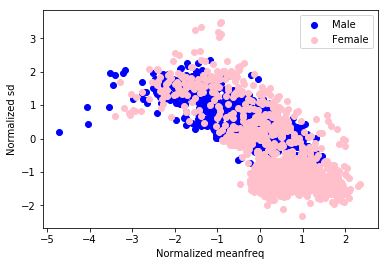

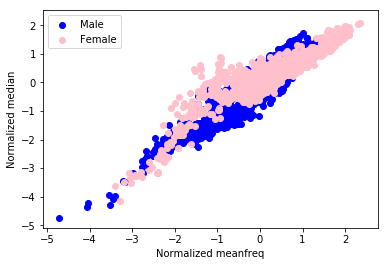

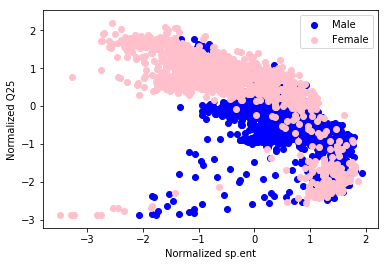

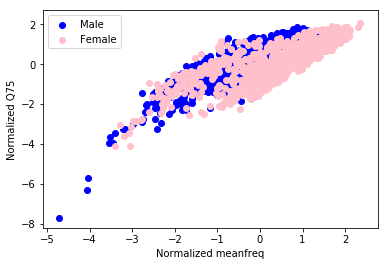

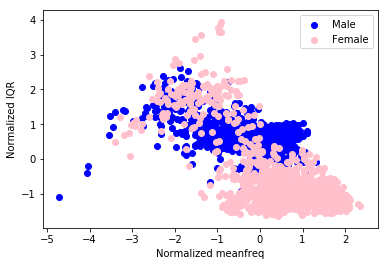

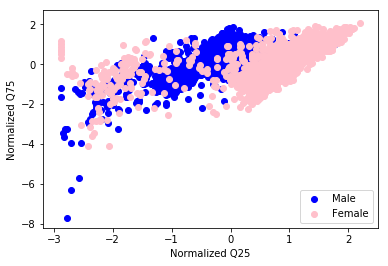

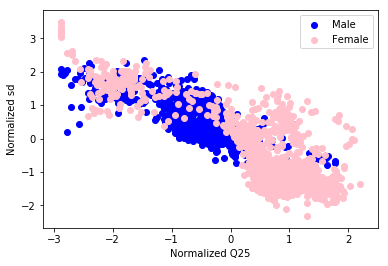

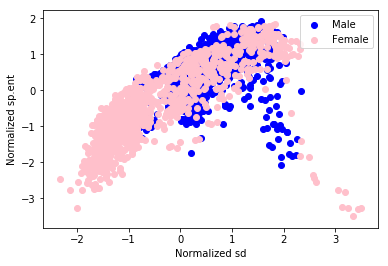

In [8]:
scatterplots(features, df_voice["gender"], ["blue", "pink"],  ["Male", "Female"],0.25, 69)

### KBest in a bar plot <a class="anchor" id="kbest"></a>
KBest is made by SKLearn itself to search for the best features for the kNN algorithm. I decided to add this as a little extra since it has a clearn design. You can easily see which features are seen as the best by SKLearn and if that goes along with what we have found through our Box and Scatter plots

In [9]:
def findKBestFeatures(df, features, label):
    selector = SelectKBest(f_classif, k=5)
    selector.fit(features, df[label])
    scores = -np.log10(selector.pvalues_)
    plt.bar(range(len(scores)), scores)
    plt.xticks(range(len(scores)), list(features), rotation="vertical")
    plt.show()

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


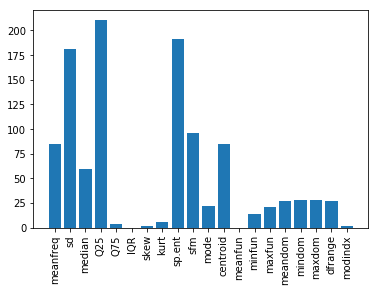

In [13]:
allfeatures = ["meanfreq", "sd", "median", "Q25", "Q75", "IQR", "skew", "kurt", "sp.ent", "sfm", "mode", "centroid", "meanfun", "minfun", "maxfun", "meandom", "mindom", "maxdom", "dfrange", "modindx"]
findKBestFeatures(df_voice, df_voice[allfeatures], ["gender"])

# Conclusion <a class="anchor" id="dataset_conclusion"></a>
From the kBest test we can see that SD, Q25, sp.ent. This can also be seen in the boxplots and the scatterplots show that Q25 and sd go well together and Q25 and sp.ent. I will run multiple tests using multiple sests of features but we are going to use:
- SD
- Q25
- sp.ent
- meanfreq
- smf
- centroid

# Prepairing the data <a class="anchor" id="prep_data"></a>
## Splitting Train and Test and Scaling

In [14]:
def trainTestSplit(df, features, label, size, seed):
    x = df[features]
    y = df[label]
    scaler = StandardScaler().fit(x)
    x = scaler.transform(x)
    return train_test_split(x,y,test_size=size, random_state=seed)

# Machine learning <a class="anchor" id="machine_learning"></a>
## Accuracy tests <a class="anchor" id="ml_accuracy"></a>
We want to test our data as efficient and modular as possible. I started noticing a pattern within the machine learning algorithms, you always define the classifier and then just use `clf.fit(X_train, y_train)`, `y_pred = clf.predict(x_test)` and `accuracy_score(y_test, y_pred)`. This means I can store these classifiers in a list and simpely loop over them instead of having to call the same sort of method around 12 times.

The make it easier to read I have provided the optional parameter `methodnames` so I can give a list of string that corrospond to the right method that was used. So instead of only printing out simple percentages, we get a nice summery in something like this:
*SVM: 96.46942%*
*Neural Network 1 Layer: 60.1684%*
*Neural Network 2 Layers: 86.6654%*

This gives us a nice and clean overview of what has been done with what method and removes the otherwise cluthered mess.
I could have included the normalizing and train test splitting within this method but decided not to do so for simplicity.
Having to explain a method like that would take a lot of space and I would prefer to keep that seperated in the datacleaning section.

In [92]:
from itertools import chain

def accuracy(methods, X_train, X_test, y_train, y_test,):
    allaccuracies=[]
    for i in range(len(methods)): #Loop through all methods
        methodaccuracies=[]
        for m in range(len(methods[i][1])): #Loop through all classifiers
            methods[i][1][m].fit(X_train, y_train) #Train the data
            y_pred = methods[i][1][m].predict(X_test)
            allaccuracies.append(accuracy_score(y_test, y_pred))
            methodaccuracies.append(accuracy_score(y_test, y_pred))
            print(methods[i][0][m] + ": " + str(accuracy_score(y_test, y_pred)*100) + "%")
        plt.plot(range(len(methods[i][0])), methodaccuracies)
        plt.ylabel("Accuracy percentage")
        plt.xlabel(methods[i][2] + " progress")
        plt.show()
    plt.figure(figsize=(15,10))
    names = [el[0] for el in methods] #Get all names from all methods
    names = list(chain.from_iterable(names)) #Place the names all in one list
    barlist = plt.bar(range(len(names)),allaccuracies)
    plt.xticks(range(len(names)), names, rotation='vertical')
    for i in range(len(barlist)):
        if(i < svcamount):
            barlist[i].set_color('r')
        elif(i < treeamount + svcamount) and (i >= svcamount):
            barlist[i].set_color('b')
        else:
            barlist[i].set_color('g')
        if(i == 0):
            barlist[i].set_label(methods[0][2])
        elif(i == svcamount):
            barlist[i].set_label(methods[1][2])
        elif(i== svcamount+treeamount):
            barlist[i].set_label(methods[2][2])
    plt.legend()

# TODO DESCRIBE METHOD AND MAKE PLOTS MODULAR BECAUSE REASONS
methods is a list [[names], [classifiers], Name]

## Prepairing for the accuracy tests 
Because the method does a lot by itself we only need to make our classifiers and add these to a list.
I am going to prepare 2 lists, one with methods and one with methodnames.
For the tests I will be trying out a lot of options within the parameters of the classifiers. These will all be noted in the methodnames to keep things organized.

In [63]:
methods = []
methodnames = []
svcamount =11
treeamount=13
mlpamount=9
total = 33

## Adding the classifiers <a class="anchor" id="mp_add_clf"></a>

# SVM <a class="anchor" id="ml_svm"></a>
To start off, we want to start adding SVM Classifiers, we have only used the linear kernel before so I decided to stick to that and only vary the C. I have decided to start off with small differences and then jump bigger gaps. This is just to save efford as the higher up Cs won't really matter.

In [66]:
methods = []
methodnames = []
methods.append(SVC(kernel='linear', C=2))
methods.append(SVC(kernel='linear', C=3))
methods.append(SVC(kernel='linear', C=4))
methods.append(SVC(kernel='linear', C=5))
methods.append(SVC(kernel='linear', C=6))
methods.append(SVC(kernel='linear', C=7))
methods.append(SVC(kernel='linear', C=8))
methods.append(SVC(kernel='linear', C=10))
methods.append(SVC(kernel='linear', C=20))
methods.append(SVC(kernel='linear', C=50))
methods.append(SVC(kernel='linear', C=100))
methodnames.append("Linear SVC with C=2")
methodnames.append("Linear SVC with C=3")
methodnames.append("Linear SVC with C=4")
methodnames.append("Linear SVC with C=5")
methodnames.append("Linear SVC with C=6")
methodnames.append("Linear SVC with C=7")
methodnames.append("Linear SVC with C=8")
methodnames.append("Linear SVC with C=10")
methodnames.append("Linear SVC with C=20")
methodnames.append("Linear SVC with C=50")
methodnames.append("Linear SVC with C=100")
svm = [methodnames, methods, "SVC"]

# Decision Tree Classifier <a class="anchor" id="ml_dtc"></a>
Decision Tree Classifier has 2 modifiers that we want to play with. 
    - max_depth: give the amount of nodes maximum per tree.
    - min_samples_leaf: the amount of samples needed to make a node.
    
To test these we decided to take a range of 3-7 for the max_depth and 2=9 for min_samples_leaf. These variables are spread out to get 12 classifiers. We also added an unrestricted default classifier to see how it would compare.

In [67]:
methods = []
methodnames = []
methods.append(tree.DecisionTreeClassifier())
methods.append(tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 2))
methods.append(tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 5))
methods.append(tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 7))
methods.append(tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 9))
methods.append(tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 2))
methods.append(tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 5))
methods.append(tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 7))
methods.append(tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 9))
methods.append(tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_leaf = 2))
methods.append(tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_leaf = 5))
methods.append(tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_leaf = 7))
methods.append(tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_leaf = 9))

methodnames.append("Decision Tree Basic")
methodnames.append("Decision Tree with Depth 3 and Minimun samples leaf 2")
methodnames.append("Decision Tree with Depth 3 and Minimun samples leaf 5")
methodnames.append("Decision Tree with Depth 3 and Minimun samples leaf 7")
methodnames.append("Decision Tree with Depth 3 and Minimun samples leaf 9")
methodnames.append("Decision Tree with Depth 5 and Minimun samples leaf 2")
methodnames.append("Decision Tree with Depth 5 and Minimun samples leaf 5")
methodnames.append("Decision Tree with Depth 5 and Minimun samples leaf 7")
methodnames.append("Decision Tree with Depth 5 and Minimun samples leaf 9")
methodnames.append("Decision Tree with Depth 7 and Minimun samples leaf 2")
methodnames.append("Decision Tree with Depth 7 and Minimun samples leaf 5")
methodnames.append("Decision Tree with Depth 7 and Minimun samples leaf 7")
methodnames.append("Decision Tree with Depth 7 and Minimun samples leaf 9")
treelist = [methodnames, methods, "Decision Tree"]

# Neural Networks <a class="anchor" id="ml_mlp"></a>
With the neural networks there was only one parameter we could touch, `hidden_layer_sizes`.
With this parameter we can declare the amount of layers and the amount of nodes within each layer. It was decided to use a 3x3 structure resulting in 9 classifiers. First of all we had "slim", "regular" and "thick" to work with, these correspond to the size of the hidden layers. "Slim" goes down rapidly, "regular" decreases linear and "thick" goes down very slowly. The other factor was the amount of layers; 1, 2 and 3.

The only real issue I ran in to with this concept is that a neural network with 1 layer can't decrease over time. I have chosen to go with 2, 100 and 200 nodes to represent the slim, regular and thick variants.

In [90]:
methods = []
methodnames = []
methods.append(MLPClassifier(hidden_layer_sizes=(100,)))
methods.append(MLPClassifier(hidden_layer_sizes=(20,)))
methods.append(MLPClassifier(hidden_layer_sizes=(200,)))
methods.append(MLPClassifier(hidden_layer_sizes=(100,50,)))
methods.append(MLPClassifier(hidden_layer_sizes=(100,20,)))
methods.append(MLPClassifier(hidden_layer_sizes=(100,80,)))
methods.append(MLPClassifier(hidden_layer_sizes=(100,50,30)))
methods.append(MLPClassifier(hidden_layer_sizes=(100,20,10,)))
methods.append(MLPClassifier(hidden_layer_sizes=(100,80,60)))
methodnames.append("MLP Neural Network with regular 1 hidden layer")
methodnames.append("MLP Neural Network with slim 1 hidden layers")
methodnames.append("MLP Neural Network with thick 1 hidden layers")
methodnames.append("MLP Neural Network with regular 2 hidden layers")
methodnames.append("MLP Neural Network with slim 2 hidden layers")
methodnames.append("MLP Neural Network with thick 2 hidden layers")
methodnames.append("MLP Neural Network with regular 3 hidden layers")
methodnames.append("MLP Neural Network with slim 3 hidden layers")
methodnames.append("MLP Neural Network with thick 3 hidden layers")
mlp = [methodnames, methods, "Neural Network"]

In [91]:
methods = []
methods.append(svm)
methods.append(treelist)
methods.append(mlp)

### Controlling the lists <a class="anchor" id="ml_test_clf"></a>
To make sure we are always getting the names right with our methods used I wrote a little test. This will try and check if the amount of methods is equal to the amount of method names supplied. If this is not the case we can not present the names with the accuracy gotten.

In [36]:
print("Amount of methods: " + str(len(methods[1])))
print("Amount of names: " + str(len(methods[0])))
if(len(methods[1])==len(methods[0])):
    print("Correct amount of method names")
elif(methodnames == 0):
    print("No method names supplied")
else:
    print("Wrong amount of method names supplied")

Amount of methods: 3
Amount of names: 3
Correct amount of method names


# Comparing the methods <a class="anchor" id="ml_comp_clf"></a>
## Making a dataframe with Ensembly learning

In [21]:
def ensembleLearning(X_train, X_test, y_train, y_test, methods):
    result = [] #Used to store fixed y_test
    correct = 0 #Used to store the amount guessed correct by Ensembly learning
    for x in np.nditer(y_test): #Go over y_test
        result.append(int(x)) #Fix y_test indexing issues
    columns = ["SVC", "Tree", "MLP", "Majority", "Best Algorithm (= MLP)", "Ensemble Learning", "Correct Label", "Correct amount"] #Colums used in the dataframe
    df_results = pd.DataFrame(columns=columns) #Make a new empty dataframe
    for i in range(len(methods)): #Go through all methods
        methods[i].fit(X_train, y_train) #Train all the data
    for i in range(len(X_test)): #Go through all data
        y_pred = [] #Prepare a new list for the results of THIS line
        for m in range(len(methods)): #Go through all methods 
            y_pred.append(int(methods[m].predict(X_test[i].reshape(1, -1)))) #Add the result to a list
        best = y_pred[2] #TODO Edit this later to set the best
        most = max(set(y_pred), key=y_pred.count) #Set the most frequent labels
        if(y_pred[0] != y_pred[1]) and (y_pred[0] != y_pred[2]) and (y_pred[1] != y_pred[2]): #Check if they are all the same
            ensemble = best #Set the best as the ensemble since everything is different
        else: #There are labels selected more than once so we should pick the most
            ensemble = most #Set the most as the ensemble 
        if(ensemble == result[i]): #if ansemble is correct
            correct = correct + 1 #Add the total amount to get a accuracy
        df_results.loc[i] = [y_pred[0], y_pred[1], y_pred[2], most, best, ensemble, result[i], correct] #Put the row into the dataframe with the results.
    print("Accuracy of Ensemble learning:" + str(correct/len(X_test)*100)+"%") #Print the accuracy of essembly learning
    return df_results #Return the dataframe made

## Explaining the code
While the code is already explained in comments, I feel like a markdown explanation will do a lot.
### Defining the method
To start off any method we define it.
```py
def ensembleLearning(X_train, X_test, y_train, y_test, methods)
```
#### Parameters
    - X_train: A set of features used for training the classifiers
    - X_test:  A set of features used for testing the classifiers
    - y_train: The set of labels that belong to the train points
    - y_test:  The set of labels that belong to the test points
    - methods: A list of classifiers to be used in the ensembly learning.
### Fixing y_test
In the previous challenge we also had issues using the list since it is indexed in a unconvensional way. This piece of code is made to reindex the list and make it accessable to us.
```py
result = [] #Used to store fixed y_test
correct = 0 #Used to store the amount guessed correct by Ensembly learning
for x in np.nditer(y_test): #Go over y_test
    result.append(int(x)) #Fix y_test indexing issues
```
### Creating an empty dataframe for the Ensemble Learning data
We want to show the data gathered in a presentable way, this is why I have decided to use a dataframe. It is easy to navigate, visualise and works nicely.
We first want to set up the columns, these are currently hardcoded but could also be given with the method. I did not find that  usefull within this sample so decided against it.
```py
columns = ["SVC", "Tree", "MLP", "Majority", "Best Algorithm (= MLP)", "Ensemble Learning", "Correct Label", "Correct amount"] 
```
We now want to create an empty dataframe to start working in. Pandas has the `pandas.DataFrame()` method which returns an empty dataframe. We can add our premade columns to this by using the `columns` parameter.
```py
df_results = pd.DataFrame(columns=columns) 
```
### Training the classifiers
All of our classifiers are within a list so we can easily train them by going through them in a loop and calling the `fit()` method.
```py
for i in range(len(methods)): #Go through all methods
    methods[i].fit(X_train, y_train) #Train all the data
```
# TODO FINISH THIS

# Test with Iris dataset <a class="anchor" id="test_iris"></a>
# TODO, WITH DID I TEST WITH THIS DATASET

In [22]:
df_iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None,names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species'])
df_iris['Class'] = df_iris['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
X_iristrain, X_iristest, y_iristrain, y_iristest = trainTestSplit(df_iris, ["Petal Length", "Petal Width"], ["Class"], 0.25, 33)
methodstest = []
methodstest.append(SVC(kernel='linear', C=10))
methodstest.append(tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 5))
methodstest.append(MLPClassifier(hidden_layer_sizes=3))
result = ensembleLearning(X_iristrain, X_iristest, y_iristrain, y_iristest, methodstest)
result.head(5)

Accuracy of Ensemble learning:94.73684210526315%


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


,SVC,Tree,MLP,Majority,Best Algorithm (= MLP),Ensemble Learning,Correct Label,Correct amount
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,2
2,0,0,1,0,1,0,0,3
3,1,1,1,1,1,1,1,4
4,1,1,1,1,1,1,2,4


Linear SVC with C=2: 94.7368421053%
Linear SVC with C=3: 94.7368421053%
Linear SVC with C=4: 94.7368421053%
Linear SVC with C=5: 94.7368421053%
Linear SVC with C=6: 94.7368421053%
Linear SVC with C=7: 94.7368421053%
Linear SVC with C=8: 94.7368421053%
Linear SVC with C=10: 94.7368421053%
Linear SVC with C=20: 94.7368421053%
Linear SVC with C=50: 94.7368421053%
Linear SVC with C=100: 94.7368421053%


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


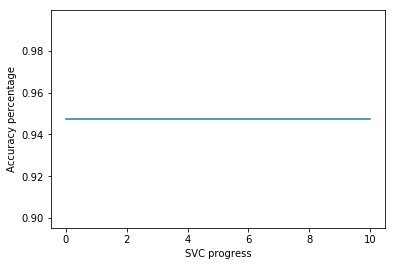

Decision Tree Basic: 92.1052631579%
Decision Tree with Depth 3 and Minimun samples leaf 2: 97.3684210526%
Decision Tree with Depth 3 and Minimun samples leaf 5: 94.7368421053%
Decision Tree with Depth 3 and Minimun samples leaf 7: 94.7368421053%
Decision Tree with Depth 3 and Minimun samples leaf 9: 94.7368421053%
Decision Tree with Depth 5 and Minimun samples leaf 2: 97.3684210526%
Decision Tree with Depth 5 and Minimun samples leaf 5: 94.7368421053%
Decision Tree with Depth 5 and Minimun samples leaf 7: 94.7368421053%
Decision Tree with Depth 5 and Minimun samples leaf 9: 94.7368421053%
Decision Tree with Depth 7 and Minimun samples leaf 2: 97.3684210526%
Decision Tree with Depth 7 and Minimun samples leaf 5: 94.7368421053%
Decision Tree with Depth 7 and Minimun samples leaf 7: 94.7368421053%
Decision Tree with Depth 7 and Minimun samples leaf 9: 94.7368421053%


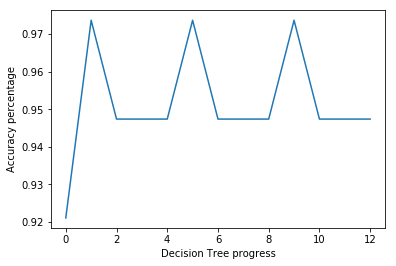

C:\Program Files\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLP Neural Network with regular 1 hidden layer: 94.7368421053%
MLP Neural Network with slim 1 hidden layers: 94.7368421053%
MLP Neural Network with thick 1 hidden layers: 94.7368421053%
MLP Neural Network with regular 2 hidden layers: 94.7368421053%
MLP Neural Network with slim 2 hidden layers: 94.7368421053%
MLP Neural Network with thick 2 hidden layers: 94.7368421053%
MLP Neural Network with regular 3 hidden layers: 94.7368421053%
MLP Neural Network with slim 3 hidden layers: 94.7368421053%
MLP Neural Network with thick 3 hidden layers: 94.7368421053%


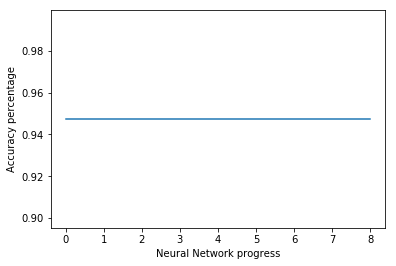

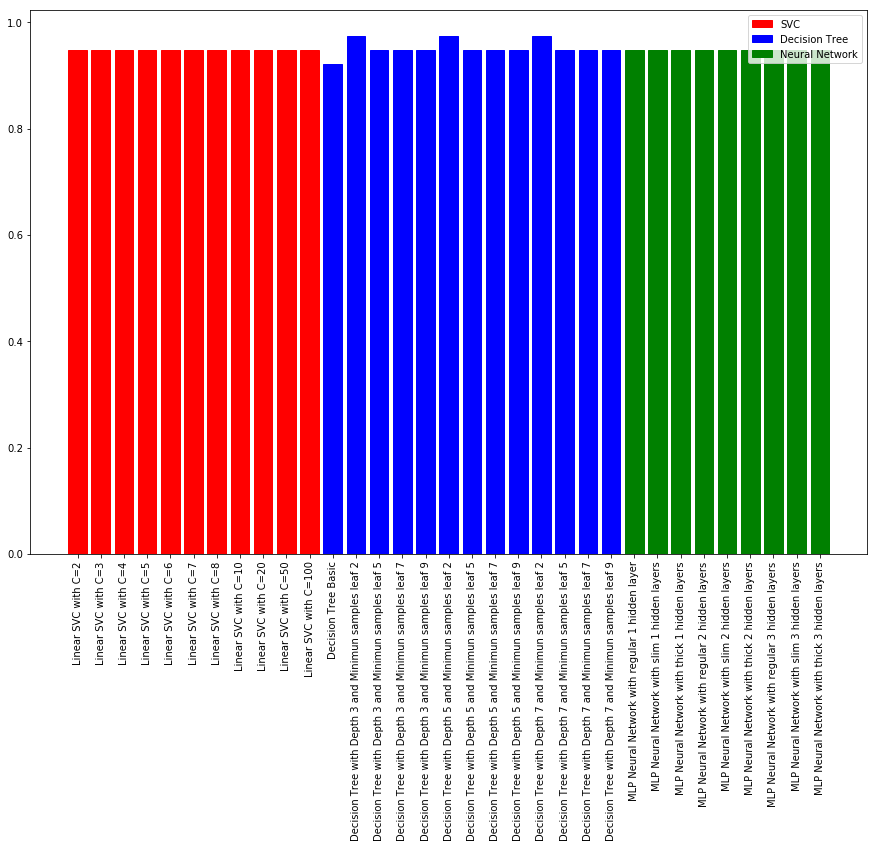

In [93]:
accuracy(methods,X_iristrain, X_iristest, y_iristrain, y_iristest)

# TODO TALK ABOUT RESULTS

# Testing with the voice dataset <a class="anchor" id="test_voice"></a>
# TODO TALK ABOUT THIS DATASET

In [ ]:
#["sd", "Q25", "sp.ent"]
X_train, X_test, y_train, y_test = trainTestSplit(df_voice, ["meanfreq", "sd", "Q25", "sp.ent", "sfm", "centroid"], ["gender"], 0.25, 33)
methodstest = []
methodstest.append(SVC(kernel='linear', C=10))
methodstest.append(tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_leaf = 5))
methodstest.append(MLPClassifier(hidden_layer_sizes=(100,50,30)))
result = ensembleLearning(X_train, X_test, y_train, y_test, methodstest)
result

In [ ]:
accuracy(methods, X_train, X_test, y_train, y_test,methodnames)

# TODO TALK ABOUT RESULTS

# TODO
# Conclusion <a class="anchor" id="conclusion"></a>
### The question <a class="anchor" id="conclusion_question"></a>
I've programmed a method which checks 3 machine learning algorithms and provd
### Personal Goals <a class="anchor" id="conclusion_personal"></a>
### What did I learn <a class="anchor" id="conclusion_learn"></a>